In [ ]:
!pip install rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import rdflib
from rdflib import Graph
from rdflib import Graph, URIRef, Literal, BNode
from rdflib import Namespace, XSD, RDF, FOAF

In [ ]:
df_app = pd.read_csv("app.csv", index_col = False, names=['name','HasBagsUnderEyes','HasWeapon', 'HasClothesOfTheWrongGender', 'HairColor'], sep=",")
df_sent = pd.read_csv("sent.csv", index_col = False, names=['name','pitch','pos_freq', 'neut_freq', 'neg_freq', 'ton_mean', 'ton_max', 'ton_min', 'ton_sum', 'ton_pos_count', 'ton_neg_count'], sep=",")
df_pers = pd.read_csv("pers.csv", index_col = False, names=['type','name','text','personality'], sep=",")

<ipython-input-127-7017dfaca17d>:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_pers = pd.read_csv("pers.csv", index_col = False, names=['type','name','text','personality'], sep=",")


In [ ]:
df_pers

,type,name,text,personality
0,Яндере,YunoGasai,Личность Юно является неоднозначной. Обычно он...,"[неоднозначная, милая, вежливая, застенчивая, ..."
1,Дарудере,SleepyAshKuro,"Будучи Сервампом Лени, Куро проводит время во ...","[лень, бездельничая, играя в видеоигры, стыда,..."
2,Гиседере,YoonBum,"Юн Бум тихий, застенчивый и чувствительный. Он...","[тихий, застенчивый, чувствительный, оскорблен..."
3,Цундере,TaigaAisaka,Она хорошо воспитана и обладает прекрасной вне...,"[хорошо воспитана, прекрасной внешностью, несп..."


In [ ]:
df_sent

,name,pitch,pos_freq,neut_freq,neg_freq,ton_mean,ton_max,ton_min,ton_sum,ton_pos_count,ton_neg_count
0,YunoGasai,201.5,0.55,0.25,0.20,0.55,0.61,-0.43,0.87,4.72,5.13
1,YoonBum,192.3,0.15,0.40,0.42,0.48,0.44,-0.61,-0.33,3.51,6.47


In [ ]:
df_app

,name,HasBagsUnderEyes,HasWeapom,HasClothesOfTheWrongGender,HairColor
0,YunoGasai,False,True,False,pink
1,YoonBum,True,False,True,black


In [ ]:
df_pers = df_pers.set_index('name')
df_sent = df_sent.set_index('name')
df_app = df_app.set_index('name')
df = pd.concat([df_pers, df_sent, df_app],axis=1, join='outer')
#df = df.reset_index()
df

,type,text,personality,pitch,pos_freq,neut_freq,neg_freq,ton_mean,ton_max,ton_min,ton_sum,ton_pos_count,ton_neg_count,HasBagsUnderEyes,HasWeapon,HasClothesOfTheWrongGender,HairColor
name,,,,,,,,,,,,,,,,,
YunoGasai,Яндере,Личность Юно является неоднозначной. Обычно он...,"[неоднозначная, милая, вежливая, застенчивая, ...",201.5,0.55,0.25,0.20,0.55,0.61,-0.43,0.87,4.72,5.13,False,True,False,pink
SleepyAshKuro,Дарудере,"Будучи Сервампом Лени, Куро проводит время во ...","[лень, бездельничая, играя в видеоигры, стыда,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YoonBum,Гиседере,"Юн Бум тихий, застенчивый и чувствительный. Он...","[тихий, застенчивый, чувствительный, оскорблен...",192.3,0.15,0.40,0.42,0.48,0.44,-0.61,-0.33,3.51,6.47,True,False,True,black
TaigaAisaka,Цундере,Она хорошо воспитана и обладает прекрасной вне...,"[хорошо воспитана, прекрасной внешностью, несп...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Создание графа
g = Graph()

from rdflib import Namespace

animePerson = Namespace("http://example.org/anime_person/")
personality = Namespace("http://example.org/personality/")
voice = Namespace("http://example.org/voice/")
sentence = Namespace("http://example.org/sentence/")
appearance = Namespace("http://example.org/appearance/")

URI = "http://anime_person.org/"

# Создание URI узла графа
name = 'UnoGasay'
person = URIRef(URI + name)

color="pink"
# Создание триплетов в графе
g.add((person, RDF.type, FOAF.Person))

# Добавление внешних признаков
appearancee = URIRef(URI + name + '/appearance')
g.add((person, appearance.app, appearancee)) # внешность персонажа

# тип личности
g.add((person, personality.types, Literal("яндере", datatype=XSD.string)))

g.add((person, voice.pitch, Literal(178, datatype=XSD.float))) # высота голоса

# добавление относительной частоты валентостей реплик
sentences = URIRef(URI + name + '/sentences')
g.add((person, sentence.sent, sentences)) # реплики персонажа

#добавление личностный качеств
personalityy = URIRef(URI + name + '/personality')
g.add((person, personality.pers, personalityy)) # личность персонажа

<Graph identifier=N6110edb089df412aa8f8be26f07ead91 (<class 'rdflib.graph.Graph'>)>

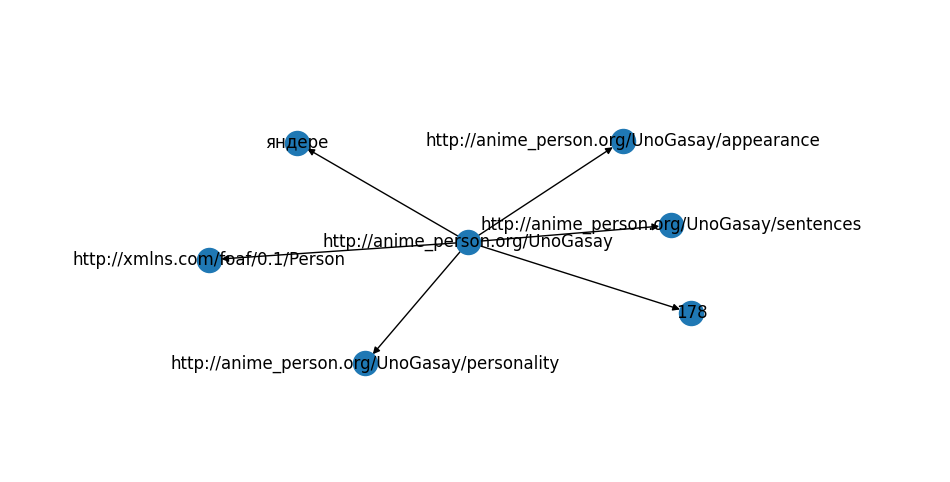

In [ ]:
# Визуализация
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph, rdflib_to_networkx_graph
import networkx as nx
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylim([-1.75, 1.75])
ax.set_xlim([-1.75, 1.75])

G = rdflib_to_networkx_multidigraph(g)

# Plot Networkx instance of RDF Graph
pos = nx.spring_layout(G, scale=2)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, ax=ax, with_labels=True)

#if not in interactive mode for
plt.show()

In [ ]:
g.add((personalityy, personality.quality, Literal('милая', datatype=XSD.string)))
g.add((personalityy, personality.quality, Literal('хладнокровная', datatype=XSD.string)))
g.add((personalityy, personality.quality, Literal('вежливая', datatype=XSD.string)))
g.add((personalityy, personality.quality, Literal('Безжалостная', datatype=XSD.string)))
g.add((personalityy, personality.quality, Literal('холодная', datatype=XSD.string)))

<Graph identifier=Nad853007769746b8a5dda91476470f4f (<class 'rdflib.graph.Graph'>)>

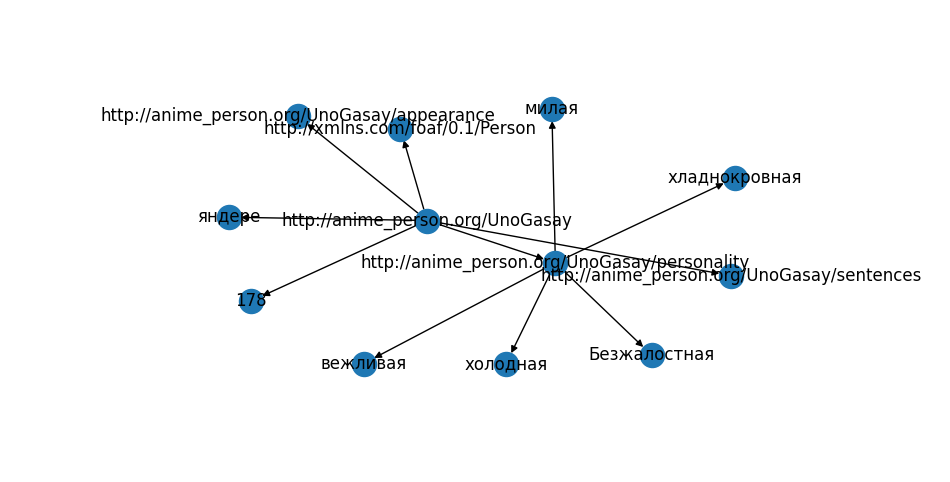

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylim([-1.75, 1.75])
ax.set_xlim([-1.75, 1.75])

G = rdflib_to_networkx_multidigraph(g)

# Plot Networkx instance of RDF Graph
pos = nx.spring_layout(G, scale=2)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, ax=ax, with_labels=True)

#if not in interactive mode for
plt.show()

In [ ]:
df = df.dropna()

In [ ]:
df

,type,text,personality,pitch,pos_freq,neut_freq,neg_freq,ton_mean,ton_max,ton_min,ton_sum,ton_pos_count,ton_neg_count,HasBagsUnderEyes,HasWeapon,HasClothesOfTheWrongGender,HairColor
name,,,,,,,,,,,,,,,,,
YunoGasai,Яндере,Личность Юно является неоднозначной. Обычно он...,"[неоднозначная, милая, вежливая, застенчивая, ...",201.5,0.55,0.25,0.20,0.55,0.61,-0.43,0.87,4.72,5.13,False,True,False,pink
YoonBum,Гиседере,"Юн Бум тихий, застенчивый и чувствительный. Он...","[тихий, застенчивый, чувствительный, оскорблен...",192.3,0.15,0.40,0.42,0.48,0.44,-0.61,-0.33,3.51,6.47,True,False,True,black


In [ ]:
# Создание графа
g = Graph()


for i, row in df.iterrows():
  person = URIRef(URI + i)

  # Создание триплетов в графе
  g.add((person, RDF.type, FOAF.Person))

  # Добавление внешних признаков
  try:
    appearancee = URIRef(URI + i + '/appearance')
    g.add((appearancee, appearance.HasBagsUnderEyes, Literal(row['HasBagsUnderEyes'], datatype=XSD.boolean))) # имеет мешки под глазами
    g.add((appearancee, appearance.HasWeapon, Literal(row['HasWeapon'], datatype=XSD.boolean))) # имеет оружие
    g.add((appearancee, appearance.HasClothesOfTheWrongGender, Literal(row['HasClothesOfTheWrongGender'], datatype=XSD.boolean))) # носит одежду, которую обычно носит противоположный пол
    g.add((appearancee, appearance.HairColor, Literal(row['HairColor'], datatype=XSD.string))) # цвет волос
    g.add((person, appearance.app, appearancee)) # внешность персонажа

    g.add((person, personality.types, Literal(row['type'], datatype=XSD.string))) # тип личности

    g.add((person, voice.pitch, Literal(row['pitch'], datatype=XSD.float))) # высота голоса
  except:
    print('')

  try:
    # добавление относительной частоты валентостей реплик
    sentences = URIRef(URI + i + '/sentences')
    g.add((sentences, sentence.pos_freq, Literal(row['pos_freq'], datatype=XSD.float)))
    g.add((sentences, sentence.neut_freq, Literal(row['neut_freq'], datatype=XSD.float)))
    g.add((sentences, sentence.neg_freq, Literal(row['neg_freq'], datatype=XSD.float)))


    #добавление средних значений разных метрик тональностей реплик
    g.add((sentences, sentence.ton_mean, Literal(row['ton_mean'], datatype=XSD.float)))
    g.add((sentences, sentence.ton_max, Literal(row['ton_max'], datatype=XSD.float)))
    g.add((sentences, sentence.ton_min, Literal(row['ton_min'], datatype=XSD.float)))
    g.add((sentences, sentence.ton_sum, Literal(row['ton_sum'], datatype=XSD.float)))
    g.add((sentences, sentence.ton_pos, Literal(row['ton_pos_count'], datatype=XSD.float)))
    g.add((sentences, sentence.ton_neg, Literal(row['ton_neg_count'], datatype=XSD.float)))
    g.add((person, sentence.sent, sentences)) # реплики персонажа
  except:
    print('')


  try:
    #добавление личностный качеств
    personalityy = URIRef(URI + i + '/personality')

    # подготовка
    symbols_to_remove = ",[]"

    text = row['personality']
    for symbol in symbols_to_remove:
        text = text.replace(symbol, "")

    print(text)

    for quality in text.split():
      g.add((personalityy, personality.quality, Literal(quality, datatype=XSD.string)))

    g.add((person, personality.pers, personalityy)) # личность персонажа
  except:
    print('')


неоднозначная милая вежливая застенчивая ревнует безжалостная холодная расчётливой  убийцей жестоким кровожадным смертью жестокая домашнего насилия боль умерли смерти одиночество влюбилась убить любого
тихий застенчивый чувствительный оскорбления отвратителен одиноким резал вены наивен проникновение отравить робкий неуверенный расстройства личности


In [ ]:
# Iterate over triples in store and print them out.
print("--- printing raw triples ---")
for s, p, o in g:
    print((s, p, o))

--- printing raw triples ---
(rdflib.term.URIRef('http://anime_person.org/YoonBum/personality'), rdflib.term.URIRef('http://example.org/personality/quality'), rdflib.term.Literal('робкий', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')))
(rdflib.term.URIRef('http://anime_person.org/YunoGasai/personality'), rdflib.term.URIRef('http://example.org/personality/quality'), rdflib.term.Literal('влюбилась', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')))
(rdflib.term.URIRef('http://anime_person.org/YoonBum/appearance'), rdflib.term.URIRef('http://example.org/appearance/HasWeapon'), rdflib.term.Literal('false', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#boolean')))
(rdflib.term.URIRef('http://anime_person.org/YoonBum/personality'), rdflib.term.URIRef('http://example.org/personality/quality'), rdflib.term.Literal('застенчивый', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')))
(rdflib.term.URIRef('http://a

In [ ]:
g.serialize(destination="tbl.ttl")

<Graph identifier=N54fd1773637042688f210ba20c5033dc (<class 'rdflib.graph.Graph'>)>

In [ ]:
qres = g.query("""PREFIX personality: <http://example.org/personality/>
SELECT ?quality WHERE
{ <http://anime_person.org/YunoGasai/personality> personality:quality ?quality}""")

for row in qres:
    print(row["quality"])

неоднозначная
милая
вежливая
застенчивая
ревнует
безжалостная
холодная
расчётливой
убийцей
жестоким
кровожадным
смертью
жестокая
домашнего
насилия
боль
умерли
смерти
одиночество
влюбилась
убить
любого


In [ ]:
qres = g.query("""PREFIX personality: <http://example.org/personality/>
SELECT ?quality WHERE
{ <http://anime_person.org/YoonBum/personality> personality:quality ?quality}""")

for row in qres:
    print(row["quality"])

тихий
застенчивый
чувствительный
оскорбления
отвратителен
одиноким
резал
вены
наивен
проникновение
отравить
робкий
неуверенный
расстройства
личности


In [ ]:
qres = g.query("""PREFIX personality: <http://example.org/personality/>
SELECT ?x ?types WHERE
{ ?x personality:types ?types}""")

for row in qres:
    print(row)

(rdflib.term.URIRef('http://anime_person.org/YunoGasai'), rdflib.term.Literal('Яндере', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')))
(rdflib.term.URIRef('http://anime_person.org/YoonBum'), rdflib.term.Literal('Гиседере', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')))
